<h1 style=text-align:center>Polynomial(4x) Function Approximation</h1>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt

2022-01-07 18:41:36.632013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 18:41:36.632068: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


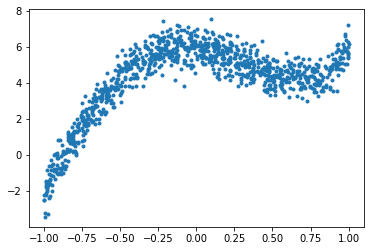

In [5]:
sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set

x_val = np.random.uniform(low = -1, high = 1, size = sample_num)
np.random.shuffle(x_val)
w1 = np.random.randint(low = -10, high = 10)
w2 = np.random.randint(low = -10, high = 10)
w3 = np.random.randint(low = -10, high = 10)
w4 = np.random.randint(low = -10, high = 10)
w5 = np.random.randint(low = -10, high = 10)

y = w1*x_val**4 + w2*x_val**3 + w3*x_val**2 + w4*x_val + w5
y_val = y + (0.6 * np.random.randn(x_val.shape[0])) # add noise
plt.plot(x_val, y_val, '.')

In [6]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

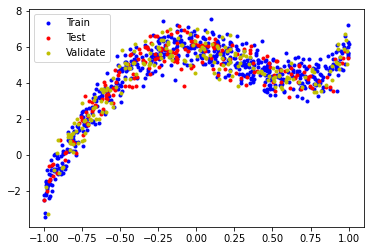

In [8]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [9]:
# model creation
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 50)                850       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


2022-01-07 18:42:03.442189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-07 18:42:03.442470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 18:42:03.442594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-07 18:42:03.442664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-07 18:42:03.445156: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [10]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Training model
history = model.fit(x_train, y_train, epochs=200, batch_size=100, validation_data=(x_val, y_val), verbose=0)

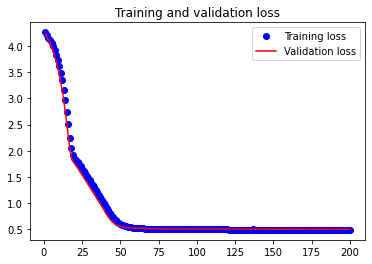

In [11]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

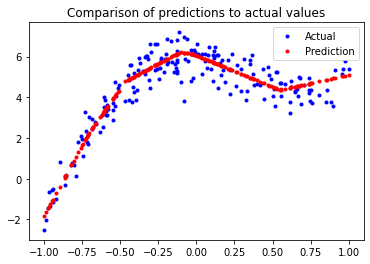

In [12]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()